[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/gaussian_blur.ipynb)

Blur image using GaussianBlur operator
======================================

In this tutorial we show how easily one can apply typical image transformations using Kornia.

Enjoy the example!

Preparation
---------------

We first install Kornia.

In [ ]:
%%capture
%matplotlib inline
!pip install kornia

In [ ]:
import kornia

kornia.__version__

'0.6.12-dev'

Now we download the example image.

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/bennett_aden.png"
download_image(url)

'bennett_aden.png'

Example
-----------

We first import the required libraries and load the data.

In [ ]:
import cv2
import kornia
import matplotlib.pyplot as plt
import numpy as np
import torch

# read the image with OpenCV
img: np.ndarray = cv2.imread("./bennett_aden.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)  # BxCxHxW

To apply a filter, we create the Gaussian Blur filter object and apply it to the data:

In [ ]:
# create the operator
gauss = kornia.filters.GaussianBlur2d((11, 11), (10.5, 10.5))

# blur the image
x_blur: torch.tensor = gauss(data.float())

That's it! We can compare the pre-transform image and the post-transform image:

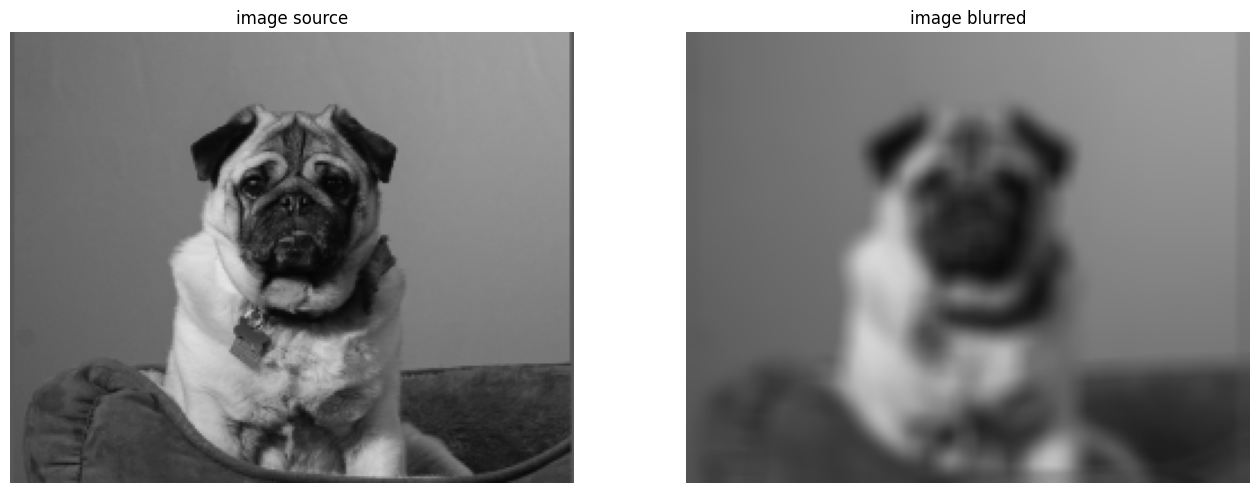

In [ ]:
# convert back to numpy
img_blur: np.ndarray = kornia.tensor_to_image(x_blur.byte())

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis("off")
axs[0].set_title("image source")
axs[0].imshow(img)

axs[1].axis("off")
axs[1].set_title("image blurred")
axs[1].imshow(img_blur)

pass